# Análise de Dados da Google Play Store

Este notebook foi criado para realizar a análise de dados do arquivo `googleplaystore.csv`, utilizando as bibliotecas `Pandas` e `Matplotlib`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura do Arquivo CSV
Esta célula realiza a leitura do arquivo `googleplaystore.csv` e exibe as primeiras linhas do DataFrame para compreendermos a estrutura dos dados.

In [4]:
dados = pd.read_csv('googleplaystore.csv')
dados.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Remoção de Linhas Duplicadas
Aqui removemos as linhas duplicadas do dataset, mantendo apenas a primeira ocorrencia do app com o maior numero de reviews, para garantir a integridade dos dados.

In [5]:
dados = dados.sort_values('Reviews', ascending=False).drop_duplicates(subset='App', keep='first')


# Tratamento dos Dados
- Esta célula converte a coluna `Installs` para um formato numérico, removendo caracteres não numéricos como '+' e ','.

- Remover possíveis vírgulas dos valores na coluna `Reviews` e `Price` e as converte novamente para numérico


In [6]:
dados['Installs'] = dados['Installs'].str.replace('+', '').str.replace(',', '')
dados = dados[dados['Installs'].str.isdigit()]
dados['Installs'] = dados['Installs'].astype(int)

dados['Reviews'] = dados['Reviews'].str.replace(',', '')
dados['Reviews'] = pd.to_numeric(dados['Reviews'], errors='coerce')

dados['Price'] = dados['Price'].str.replace('$', '').astype(float)

# Grafico de Barras: Seleção do Top 5 Apps por Número de Instalações
Esta célula seleciona os 5 aplicativos com o maior número de instalações e cria um gráfico de barras mostrando os 5 aplicativos mais instalados.

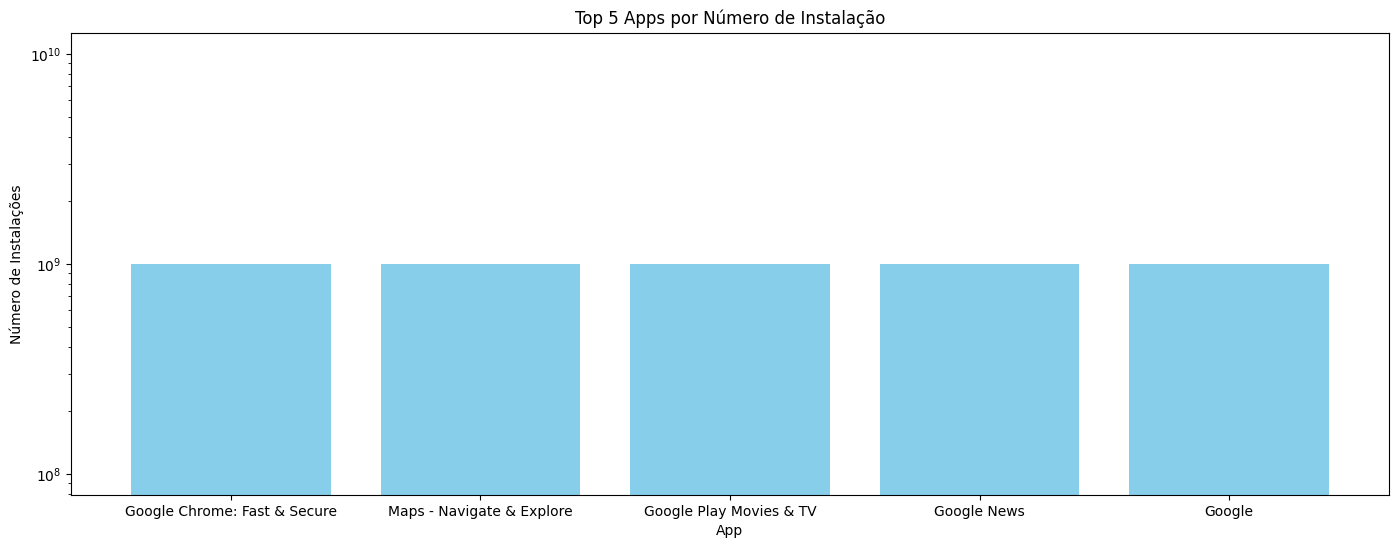

In [7]:
top5_apps = dados.nlargest(5, 'Installs')

plt.figure(figsize=(17, 6))
plt.bar(top5_apps['App'], top5_apps['Installs'], color='skyblue')
plt.title('Top 5 Apps por Número de Instalação')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.yscale('log')
plt.show()

# Gráfico de Pizza: Distribuição das Categorias de Apps
Esta célula cria um gráfico de pizza mostrando a distribuição das categorias de aplicativos.

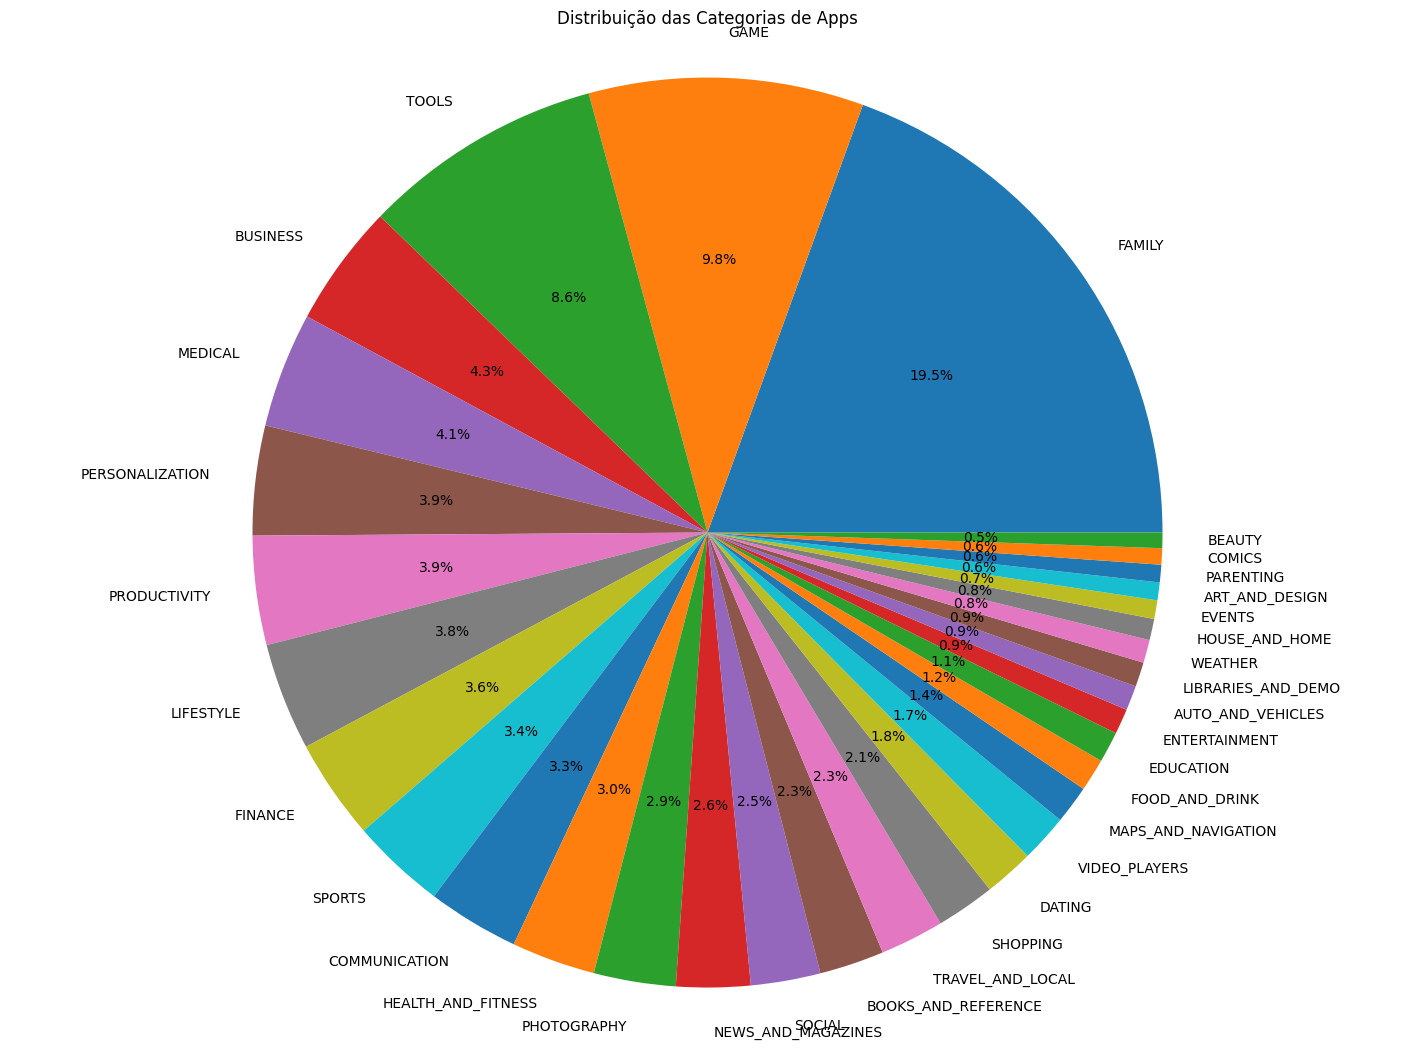

In [8]:
category_count = dados['Category'].value_counts()
plt.figure(figsize=(18, 13))
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribuição das Categorias de Apps')
plt.axis('equal')
plt.show()

# Identificação do App Mais Caro
Esta célula identifica o aplicativo mais caro presente no dataset.

In [9]:
app_mais_caro = dados.loc[dados['Price'].idxmax()]
app_mais_caro

App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                  7.3M
Installs                             10000
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 4367, dtype: object

# Contagem de Apps Classificados como "Mature 17+"
Esta célula conta quantos aplicativos são classificados como "Mature 17+".


In [10]:
mature_apps = dados[dados['Content Rating'] == 'Mature 17+'].shape[0]
print(f"Quantidade de apps classificados como 'Mature 17+': {mature_apps}")

Quantidade de apps classificados como 'Mature 17+': 393


# Seleção dos Top 10 Apps por Número de Reviews
Esta célula seleciona os 10 aplicativos com o maior número de avaliações.


In [11]:
top10_reviews = dados.nlargest(10, 'Reviews')[['App', 'Reviews']]
top10_reviews

,App,Reviews
2544,Facebook,78158306
381,WhatsApp Messenger,69119316
2604,Instagram,66577446
382,Messenger – Text and Video Chat for Free,56646578
1879,Clash of Clans,44893888
4005,Clean Master- Space Cleaner & Antivirus,42916526
1872,Subway Surfers,27725352
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1878,Clash Royale,23136735


# Gráfico de Barras Horizontal: Seleção dos Top 10 Apps por Número de Reviews
Esta célula cria um gráfico de barras horizontal para mostrar a relação entre o número de reviews e o número de instalações dos aplicativos.


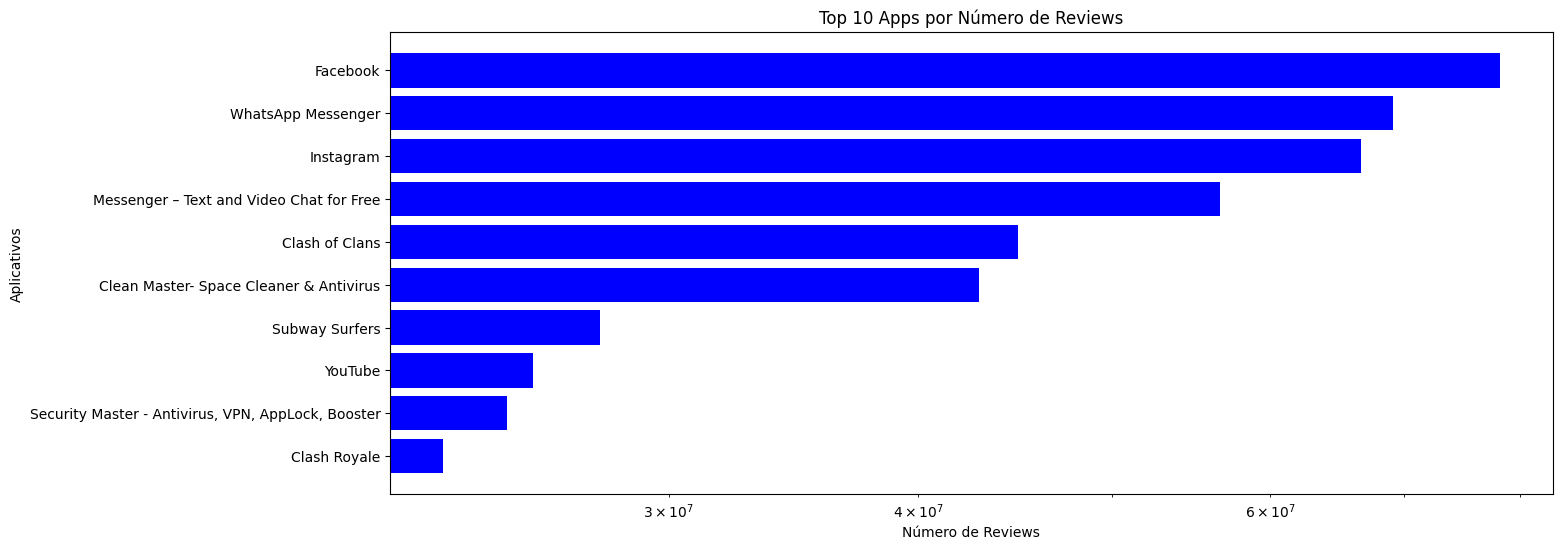

In [12]:
plt.figure(figsize=(15, 6))
plt.barh(top10_reviews['App'], top10_reviews['Reviews'], color='blue')
plt.xlabel('Número de Reviews')
plt.ylabel('Aplicativos')
plt.title('Top 10 Apps por Número de Reviews')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o maior valor fique no topo
plt.xscale('log')
plt.show()

# Total de apps pagos
Esta célula calcula a quantidade total de apps pagos

In [13]:
total_apps_pago = dados[dados['Type'] == 'Paid'].shape[0]
print(f"Total de Apps Pagos: {total_apps_pago}")

Total de Apps Pagos: 756


# Top 10 Aplicativos com Maior Receita Estimada

Nesta célula, calculamos a receita estimada para os aplicativos pagos.

In [14]:
dados['Receita_Estimada'] = dados['Installs'] * dados['Price']
top10_receita = dados[dados['Type'] == 'Paid'].nlargest(10, 'Receita_Estimada')[['App', 'Receita_Estimada', 'Price', 'Installs']]
top10_receita

,App,Receita_Estimada,Price,Installs
2241,Minecraft,69900000.0,6.99,10000000
5351,I am rich,39999000.0,399.99,100000
5356,I Am Rich Premium,19999500.0,399.99,50000
4034,Hitman Sniper,9900000.0,0.99,10000000
7417,Grand Theft Auto: San Andreas,6990000.0,6.99,1000000
2912,Facetune - For Free,5990000.0,5.99,1000000
5578,Sleep as Android Unlock,5990000.0,5.99,1000000
8804,DraStic DS Emulator,4990000.0,4.99,1000000
4367,I'm Rich - Trump Edition,4000000.0,400.00,10000
5354,I am Rich Plus,3999900.0,399.99,10000


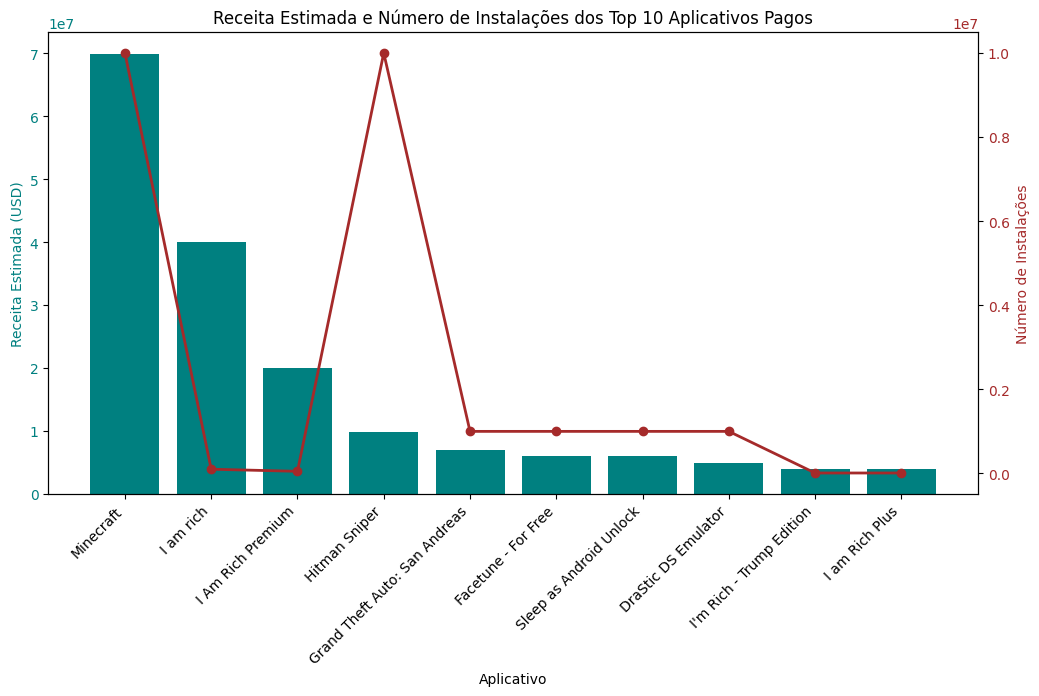

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(top10_receita['App'], top10_receita['Receita_Estimada'], color='teal')
ax1.set_xlabel('Aplicativo')
ax1.set_ylabel('Receita Estimada (USD)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

ax1.set_xticks(range(len(top10_receita['App'])))
ax1.set_xticklabels(top10_receita['App'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(top10_receita['App'], top10_receita['Installs'], color='brown', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Número de Instalações', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

plt.title('Receita Estimada e Número de Instalações dos Top 10 Aplicativos Pagos')

plt.show()


# App com o Maior Número de Reviews por Categoria

Nesta célula, identificamos o aplicativo com o maior número de reviews dentro de cada categoria.

In [16]:
top_reviews_categoria = dados.loc[dados.groupby('Category')['Reviews'].idxmax()][['Category', 'App', 'Reviews']]
top_reviews_categoria


,Category,App,Reviews
4241,ART_AND_DESIGN,Textgram - write on photos,295237
72,AUTO_AND_VEHICLES,"Android Auto - Maps, Media, Messaging & Voice",271920
117,BEAUTY,Beauty Camera - Selfie Camera,113715
4715,BOOKS_AND_REFERENCE,Wattpad 📖 Free Books,2915189
10200,BUSINESS,Facebook Pages Manager,1279800
4724,COMICS,LINE WEBTOON - Free Comics,1013944
381,COMMUNICATION,WhatsApp Messenger,69119316
7077,DATING,Zoosk Dating App: Meet Singles,516917
832,EDUCATION,"Learn languages, grammar & vocabulary with Mem...",1107948
958,ENTERTAINMENT,Netflix,5456708


# Grafico de Linha: Seleção dos Apps com mais Reviews por Categoria

Esta célula utiliza os dados da busca anterior para criar um gráfico para a visualização dos dados.

Foi utlizado a `Categoria` no eixo X devido o tamanho no nome dos Apps, que prejudicava a visualização dos dados.

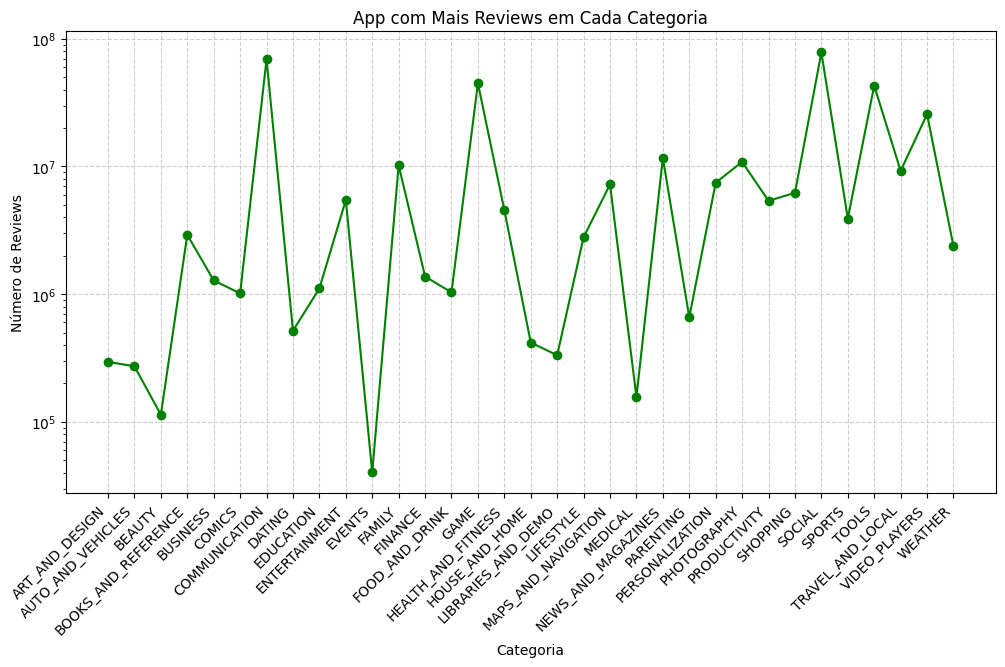

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(top_reviews_categoria['Category'], top_reviews_categoria['Reviews'], marker='o', linestyle='-', color='green')
plt.xlabel('Categoria')
plt.ylabel('Número de Reviews')
plt.title('App com Mais Reviews em Cada Categoria')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.yscale('log')
plt.show()
